In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time as tm

In [5]:
def merck_euler(population,dt,b,q,m,n,a):
    mutation = 1
    x,y = population
    dy      = np.empty(2)
    dy[0] = x + dt*(b*x*(q**(m)*(q**n))-a*x)
    dy[1] = y + dt*(mutation*(b*x*(q**m)*(1-q**n)+b*y*(q**m)-a*y))
    return(dy)

In [6]:
def simulation(init,b,a0,a1,q0,q1,m,n,tim,ttr):
    
    dt = 1e-4
    initial = [init[0],init[1]]
    population = initial.copy()
    pop_evol = []
    
    current_q = q0
    current_a = a0

    for ngen in np.arange(150/dt):
        if ngen % 10 == 0:
            pop_evol.append(population)
        
        population = merck_euler(population,dt,b,current_q,m,n,current_a)
        
        # immune system kicks in
        if ngen > tim/dt:
            current_a = a1
            
        # Merck treatment starts
        if ngen > ttr/dt:
            current_q = q1
            
    pop_evol = np.array(pop_evol)
    return(pop_evol)

In [7]:
a0 = 3
q = 1-1e-6
q1 = 1-2e-6
q2 = 1-1e-5
b=7.6
T = 5
a1=9
q0 = 1-1e-6
n = 87
m=20000
init=[1,0]
tim, ttr = 5,5

In [52]:
euler_test = simulation(init,b,a0,a1,q0,q0,m,n,tim,ttr)

In [53]:
along_q1 = []

for q1 in 1-np.logspace(-6,-2,50):
    print(list(1-np.logspace(-6,-2,50)).index(q1))
    along_q1.append(simulation(init,b,a0,a1,q0,q1,m,n,tim,ttr))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [ ]:
along_q1 = []

for q1 in 1-np.logspace(-6,-2,50):
    print(list(1-np.logspace(-6,-2,50)).index(q1))
    along_q1.append(simulation(init,b,a0,a1,q0,q1,m,n,tim,ttr))

(1.0, 100000000000.0)

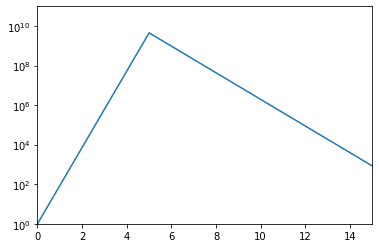

In [24]:
plt.plot(np.arange(0,15,1e-3), euler_test[:,0])
plt.yscale('log')
plt.xlim(0,15)
plt.ylim(1e0,1e11)

In [27]:
np.max(euler_test[:,0])

4569016977.974899

In [68]:
n/m

0.00435

In [3]:
len(np.arange(0,29900,10))

2990

In [10]:
euler_test = simulation(init,b,a0,a1,q0,q0,29900,1,tim,ttr)

In [11]:
euler_test[:,1][5000]/euler_test[:,0][5000]

3.686516476490606e-05

In [12]:
along_q1 = []

for q1 in 1-np.logspace(-6,-2,50):
    print(list(1-np.logspace(-6,-2,50)).index(q1))
    along_q1.append(simulation(init,b,a0,a1,q0,q1,1500,1,tim,ttr))

along_q1_2 = []

for q1 in 1-np.logspace(-6,-2,50):
    print(list(1-np.logspace(-6,-2,50)).index(q1))
    along_q1_2.append(simulation(init,b,a0,a1,q0,q1,29900,1,tim,ttr))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [13]:
1/29900

3.3444816053511705e-05

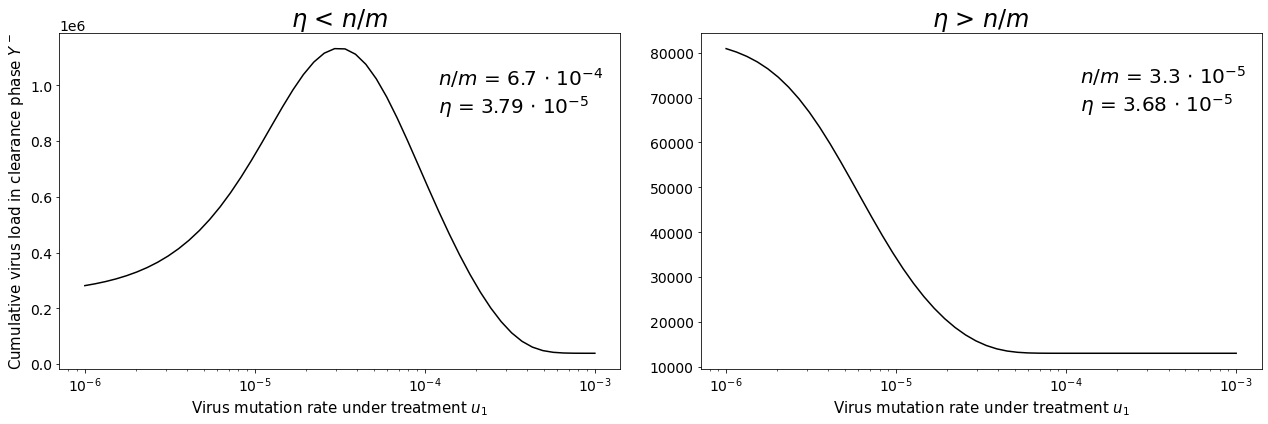

In [17]:
fig, ax = plt.subplots(1,2, figsize = (18,6))
ax[0].plot(np.logspace(-6,-3,50), [np.sum(euler_test[:,1][5000:])*1e-3 for euler_test in along_q1], c = 'k')
ax[1].plot(np.logspace(-6,-3,50), [np.sum(euler_test[:,1][5000:])*1e-3 for euler_test in along_q1_2], c = 'k')

for i in range(2):
    ax[i].set_xscale('log')
    ax[i].tick_params(labelsize = 14)
    ax[i].yaxis.offsetText.set_fontsize(14)
    ax[i].set_xlabel('Virus mutation rate under treatment $u_1$', fontsize = 15)
    
ax[0].set_ylabel('Cumulative virus load in clearance phase $Y^-$', fontsize = 15)
ax[0].set_title('$\eta$ < $n$/$m$', fontsize = 24)
ax[1].set_title('$\eta$ > $n$/$m$', fontsize = 24)

ax[0].text(1.2e-4,0.9e6, '$n/m$ = 6.7 $\cdot$ $10^{-4}$ \n$\eta$ = 3.79 $\cdot$ $10^{-5}$', fontsize = 20)
ax[1].text(1.2e-4,0.67e5, '$n/m$ = 3.3 $\cdot$ $10^{-5}$ \n$\eta$ = 3.68 $\cdot$ $10^{-5}$', fontsize = 20)

plt.tight_layout()
plt.savefig('behaviour_Yminus_referee2_new.jpg', dpi = 600, bbox_inches = 'tight')